# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [41]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [61]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
                
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['name']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | ta`u
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | reggane
Processing Record 5 of Set 1 | tommot
Processing Record 6 of Set 1 | mazagao
Processing Record 7 of Set 1 | clovis
Processing Record 8 of Set 1 | sosnovo-ozerskoye
Processing Record 9 of Set 1 | mwatate
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | iskateley
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | klyuchi
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | aitape
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | franceville
Processing Recor

Processing Record 40 of Set 4 | lompoc
Processing Record 41 of Set 4 | vila franca do campo
Processing Record 42 of Set 4 | road town
Processing Record 43 of Set 4 | atherton
Processing Record 44 of Set 4 | lensk
Processing Record 45 of Set 4 | vrangel'
Processing Record 46 of Set 4 | yangor
City not found. Skipping...
Processing Record 47 of Set 4 | tralee
Processing Record 48 of Set 4 | anadyr
Processing Record 49 of Set 4 | tuni
Processing Record 0 of Set 5 | lihue
Processing Record 1 of Set 5 | berezovyy
Processing Record 2 of Set 5 | puerto leguizamo
Processing Record 3 of Set 5 | udachny
Processing Record 4 of Set 5 | hami
Processing Record 5 of Set 5 | kavieng
Processing Record 6 of Set 5 | broome
Processing Record 7 of Set 5 | ierapetra
Processing Record 8 of Set 5 | mount isa
Processing Record 9 of Set 5 | port augusta
Processing Record 10 of Set 5 | hadibu
Processing Record 11 of Set 5 | manali
Processing Record 12 of Set 5 | callao
Processing Record 13 of Set 5 | ulladulla
P

Processing Record 30 of Set 8 | iquique
Processing Record 31 of Set 8 | tucuma
Processing Record 32 of Set 8 | sonqor
Processing Record 33 of Set 8 | severo-yeniseyskiy
Processing Record 34 of Set 8 | baoqing
Processing Record 35 of Set 8 | monopoli
Processing Record 36 of Set 8 | zeya
Processing Record 37 of Set 8 | fortuna foothills
Processing Record 38 of Set 8 | wotje
Processing Record 39 of Set 8 | kuragino
Processing Record 40 of Set 8 | we
City not found. Skipping...
Processing Record 41 of Set 8 | holualoa
Processing Record 42 of Set 8 | lake oswego
Processing Record 43 of Set 8 | chaumont
Processing Record 44 of Set 8 | port douglas
Processing Record 45 of Set 8 | yamba
Processing Record 46 of Set 8 | volodymyrets'
City not found. Skipping...
Processing Record 47 of Set 8 | tarana
Processing Record 48 of Set 8 | warman
Processing Record 49 of Set 8 | tazovsky
Processing Record 0 of Set 9 | cerkezkoy
Processing Record 1 of Set 9 | hammerfest
Processing Record 2 of Set 9 | kone


Processing Record 21 of Set 12 | ingeniero guillermo n. juarez
Processing Record 22 of Set 12 | san antonio de pale
Processing Record 23 of Set 12 | mahina
Processing Record 24 of Set 12 | moyynkum
Processing Record 25 of Set 12 | vaux-le-penil
Processing Record 26 of Set 12 | brumunddal
Processing Record 27 of Set 12 | bocana de paiwas
Processing Record 28 of Set 12 | labrador city
Processing Record 29 of Set 12 | colonia menno
Processing Record 30 of Set 12 | erenhot
Processing Record 31 of Set 12 | al ghayzah
Processing Record 32 of Set 12 | santyoku
Processing Record 33 of Set 12 | sabang
Processing Record 34 of Set 12 | las heras
Processing Record 35 of Set 12 | shimanovsk
Processing Record 36 of Set 12 | pandan
Processing Record 37 of Set 12 | beyneu
Processing Record 38 of Set 12 | bontang
Processing Record 39 of Set 12 | al jawf
Processing Record 40 of Set 12 | villa nueva
Processing Record 41 of Set 12 | targu carbunesti
Processing Record 42 of Set 12 | geraldton
Processing Re

In [62]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [63]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,4.23,78,15,1.63,Bilibino,1688652943
1,ta`u,-14.2336,-169.5144,27.53,75,95,8.20,Ta`ū,1688652944
2,bethel,41.3712,-73.4140,31.20,65,0,2.06,Bethel,1688652944
3,reggane,26.7158,0.1714,48.30,4,93,5.03,Reggane,1688652933
4,tommot,58.9564,126.2925,19.55,95,100,1.06,Tommot,1688652944


In [64]:
# Export the City_Data into a csv
city_data_df.to_csv("mycities.csv", index_label="City_ID")

In [65]:
# Read saved data
city_data_df = pd.read_csv("mycities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,4.23,78,15,1.63,Bilibino,1688652943
1,ta`u,-14.2336,-169.5144,27.53,75,95,8.20,Ta`ū,1688652944
2,bethel,41.3712,-73.4140,31.20,65,0,2.06,Bethel,1688652944
3,reggane,26.7158,0.1714,48.30,4,93,5.03,Reggane,1688652933
4,tommot,58.9564,126.2925,19.55,95,100,1.06,Tommot,1688652944


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

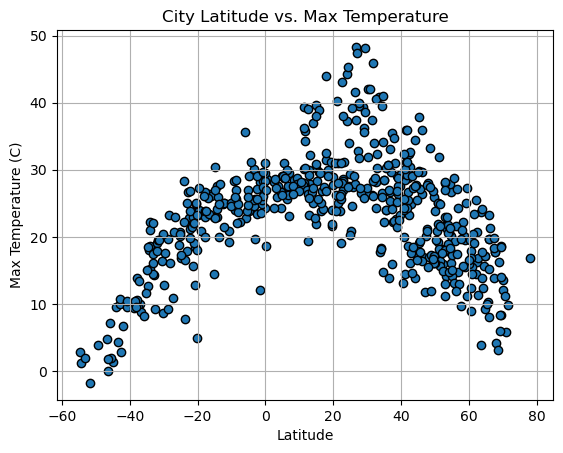

<Figure size 640x480 with 0 Axes>

In [69]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("MyFig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

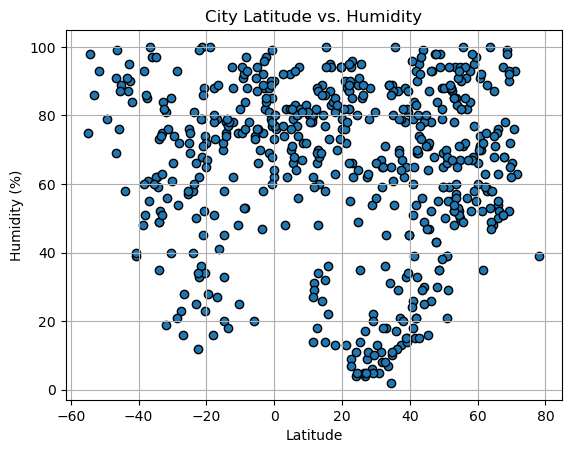

<Figure size 640x480 with 0 Axes>

In [70]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("MyFig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

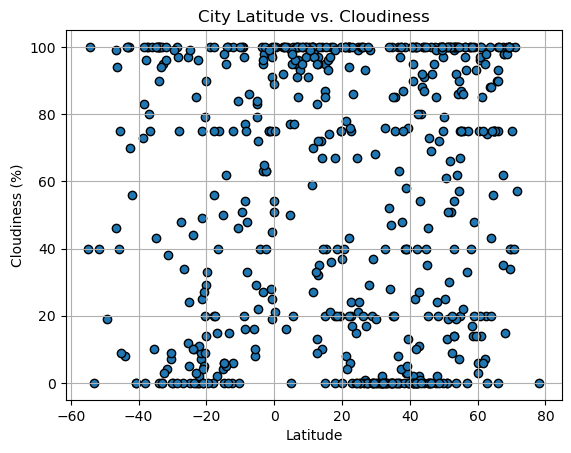

<Figure size 640x480 with 0 Axes>

In [71]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("MyFig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

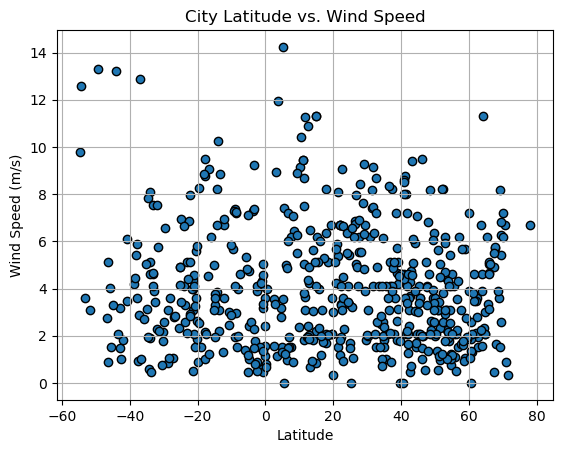

<Figure size 640x480 with 0 Axes>

In [72]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("MyFig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [177]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot the regression line
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.plot(x_values, regress_values, "r")
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Add the annotation to the plot
    plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=16, color='red')

    # Print the correlation coefficient
    print(f"The r-value is: {rvalue}")
    
    # Show plot
    plt.show()


In [178]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,4.23,78,15,1.63,Bilibino,1688652943
2,bethel,41.3712,-73.4140,31.20,65,0,2.06,Bethel,1688652944
3,reggane,26.7158,0.1714,48.30,4,93,5.03,Reggane,1688652933
4,tommot,58.9564,126.2925,19.55,95,100,1.06,Tommot,1688652944
6,clovis,36.8252,-119.7029,26.69,70,0,5.14,Clovis,1688652945


In [179]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ta`u,-14.2336,-169.5144,27.53,75,95,8.20,Ta`ū,1688652944
5,mazagao,-0.1150,-51.2894,31.03,62,51,2.41,Mazagão,1688652945
8,mwatate,-3.5029,38.3795,24.11,47,100,7.28,Mwatate,1688652945
9,grytviken,-54.2811,-36.5092,1.19,98,100,12.57,Grytviken,1688652946
10,edinburgh of the seven seas,-37.0676,-12.3116,10.03,55,80,12.89,Edinburgh of the Seven Seas,1688652946


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5919331728734579


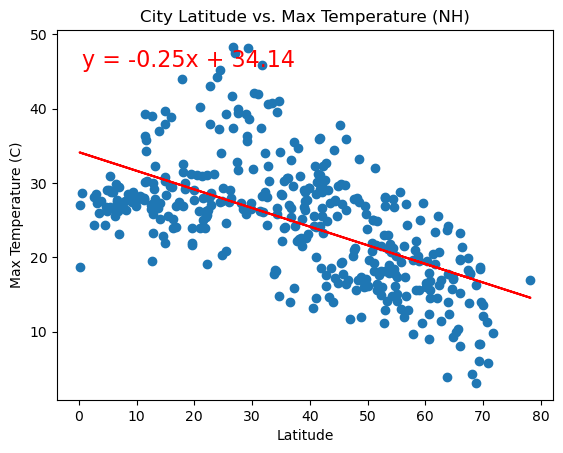

In [180]:
# Linear regression on Northern Hemisphere
#Call the previously defined linear regression function 
linear_regression_plots(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Max Temp'], 
    'Latitude', 
    'Max Temperature (C)', 
    'City Latitude vs. Max Temperature (NH)'
)

The r-value is: 0.8343123667854567


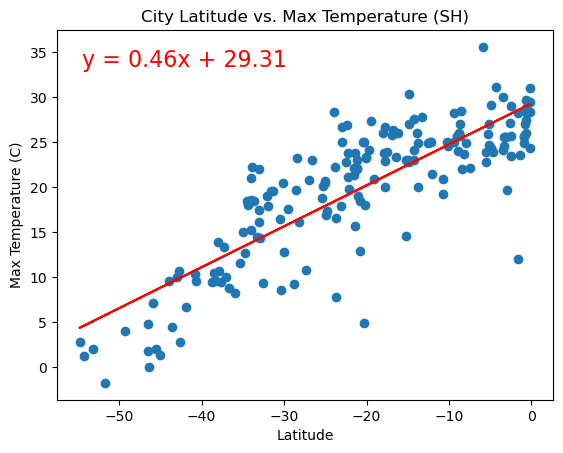

In [181]:
# Linear regression on Southern Hemisphere
#Call the previously defined linear regression function 
linear_regression_plots(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Max Temp'], 
    'Latitude', 
    'Max Temperature (C)', 
    'City Latitude vs. Max Temperature (SH)'
)

**Discussion about the linear relationship:**<br>The Northern Hemisphere's linear relationship indicates a moderate negative correlation. This indicates an inverse relationship, meaning as you move further away from the equator (0 degrees), temperature decreases. 

The Southern Hemisphere's linear relationship indicates a strong positive relationship, meaning as you move closer to the equater (0 degress), so does temperature.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.028937829696335113


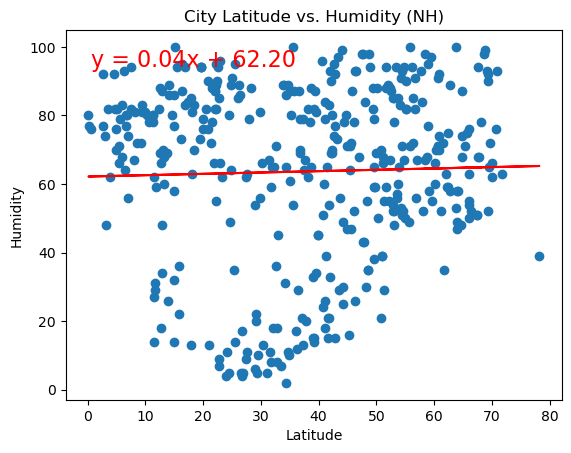

In [182]:
# Northern Hemisphere
linear_regression_plots(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Humidity'], 
    'Latitude', 
    'Humidity', 
    'City Latitude vs. Humidity (NH)'
)

The r-value is: 0.060658007711303155


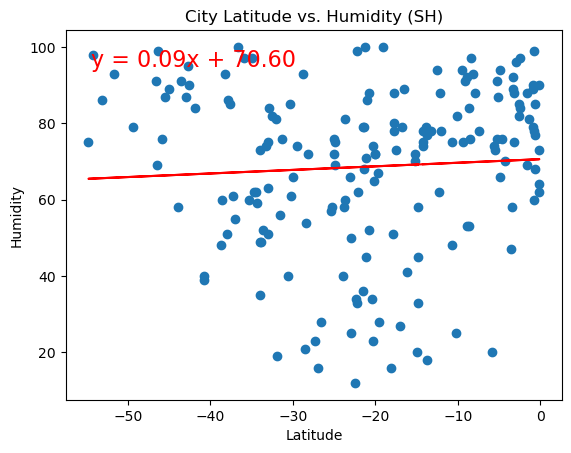

In [183]:
# Southern Hemisphere
linear_regression_plots(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Humidity'], 
    'Latitude', 
    'Humidity', 
    'City Latitude vs. Humidity (SH)'
)

**Discussion about the linear relationship:** <br> Both r values suggest a weak positive correlation between latitude and humidity as they are very close to a value of 0. There is a minimal relationship here. It seems that latitude alone may not directly indicate humidity.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.040628847273876355


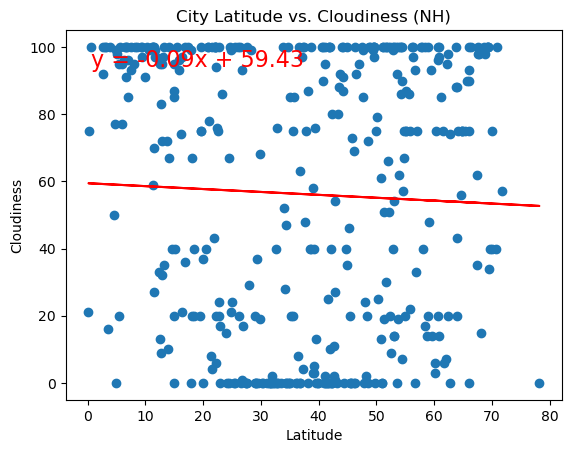

In [184]:
# Northern Hemisphere
linear_regression_plots(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Cloudiness'], 
    'Latitude', 
    'Cloudiness', 
    'City Latitude vs. Cloudiness (NH)'
)

The r-value is: 0.03804294587819073


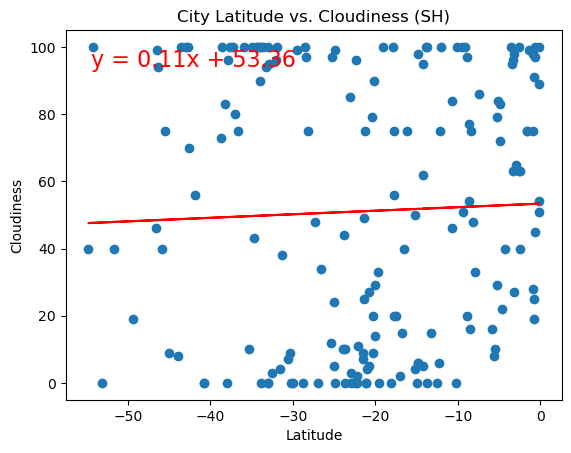

In [185]:
# Southern Hemisphere
linear_regression_plots(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Cloudiness'], 
    'Latitude', 
    'Cloudiness', 
    'City Latitude vs. Cloudiness (SH)'
)

**Discussion about the linear relationship:** <br> Both suggest very weak correlation between Latitude and Cloudiness. The Northern Hemisphere data shows a very weak negative correlation, and the Southern Hemishpere data shows a very weak positive correlation. No substantial correlation between Latititude and Cloudiness in either hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.15101576182979842


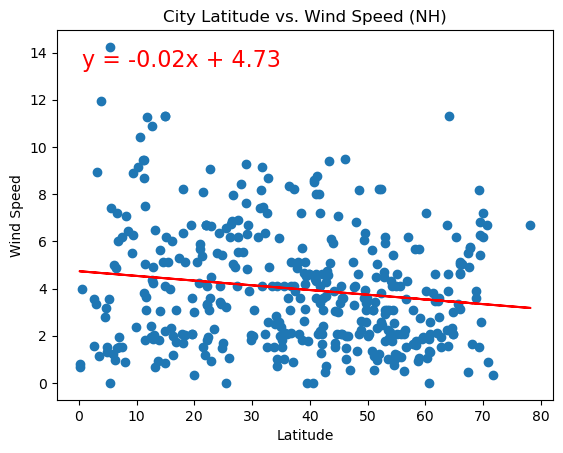

In [186]:
# Northern Hemisphere
linear_regression_plots(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Wind Speed'], 
    'Latitude', 
    'Wind Speed', 
    'City Latitude vs. Wind Speed (NH)'
)

The r-value is: -0.15030492782678323


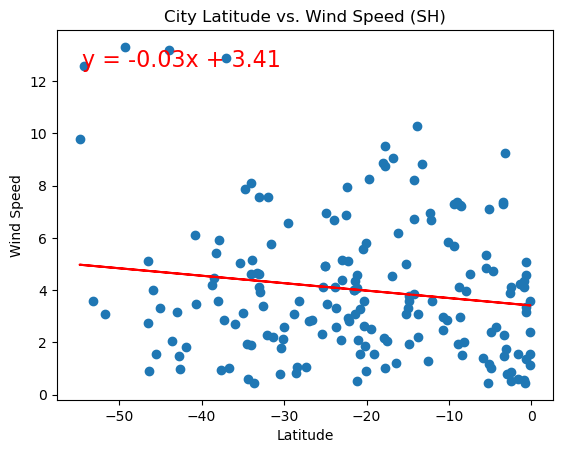

In [187]:
# Southern Hemisphere
linear_regression_plots(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Wind Speed'], 
    'Latitude', 
    'Wind Speed', 
    'City Latitude vs. Wind Speed (SH)'
)

**Discussion about the linear relationship:** <br> Across both Northern and Southern Hemispheres there is a weak negative correlation between Latitude and Wind Speed. A very slight inverse relationship. More data would be required to determine if a true relationship exists. 